In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

In [2]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.shape

(9800, 18)

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [13]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [14]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

## Data Cleaning

In [9]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
df.loc[df["Postal Code"].isna(),['Country','City','State','Postal Code']]

,Country,City,State,Postal Code
2234,United States,Burlington,Vermont,NaN
5274,United States,Burlington,Vermont,NaN
8798,United States,Burlington,Vermont,NaN
9146,United States,Burlington,Vermont,NaN
9147,United States,Burlington,Vermont,NaN
9148,United States,Burlington,Vermont,NaN
9386,United States,Burlington,Vermont,NaN
9387,United States,Burlington,Vermont,NaN
9388,United States,Burlington,Vermont,NaN
9389,United States,Burlington,Vermont,NaN


Filling the NaN values

In [12]:
final=df.copy()
final["Postal Code"]=final["Postal Code"].fillna(5401)

In [15]:
final.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

Changing the datatype of Postal Code from float64 to int64

In [16]:
final['Postal Code'] = final['Postal Code'].astype(int)
print(final.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [17]:
df.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

EDA

5. Histograms

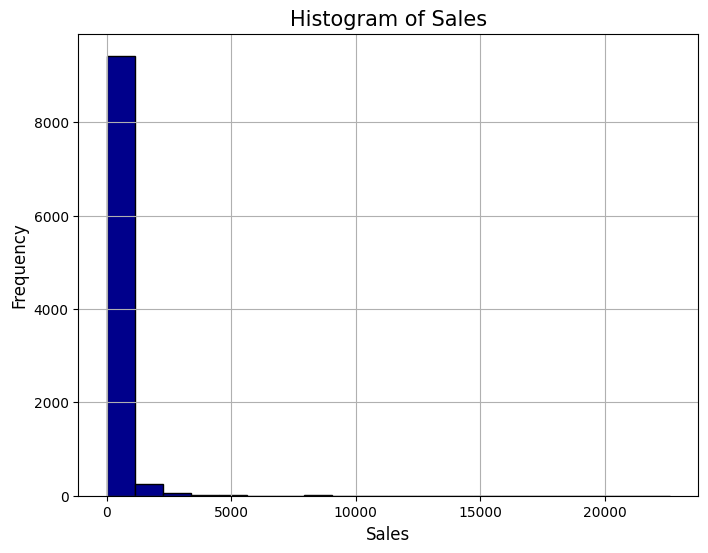

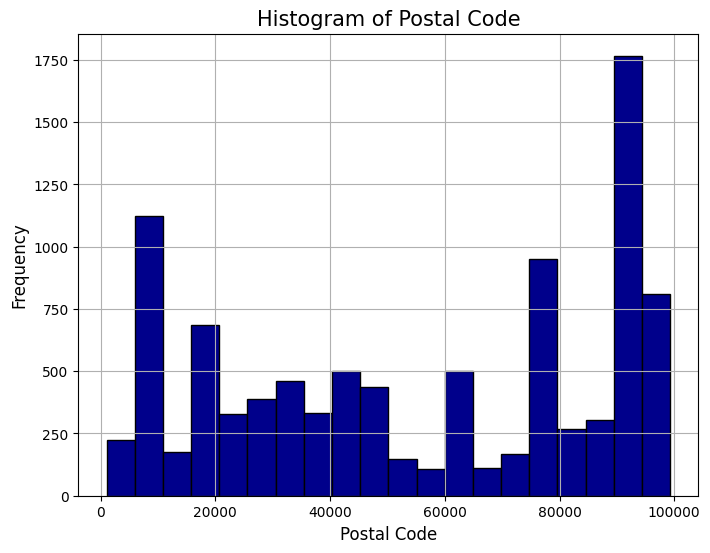

In [19]:
numeric_columns = ['Sales', 'Postal Code']  # Replace with the actual column names

# Create histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='darkblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

Time series plot

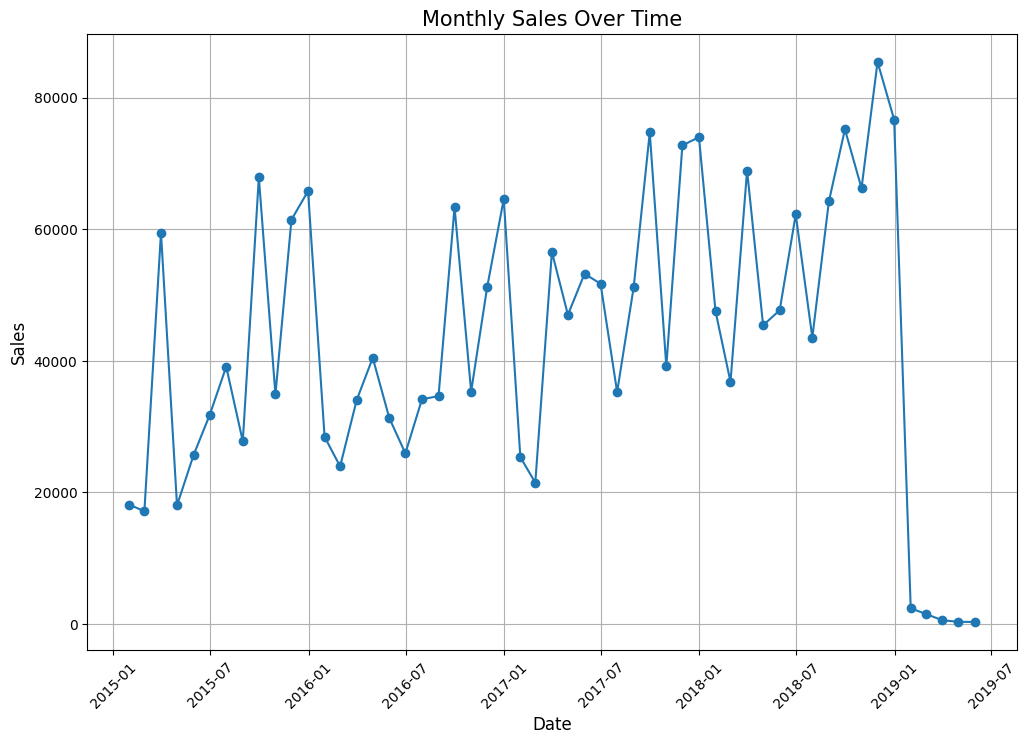

In [21]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Set 'Ship Date' as the index for the DataFrame (assuming it's not already the index)
df.set_index('Ship Date', inplace=True)

# Resample the data by month and calculate the sum of sales for each month
monthly_sales = df['Sales'].resample('M').sum()

# Create a time series plot
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


Sales Distribution by Category

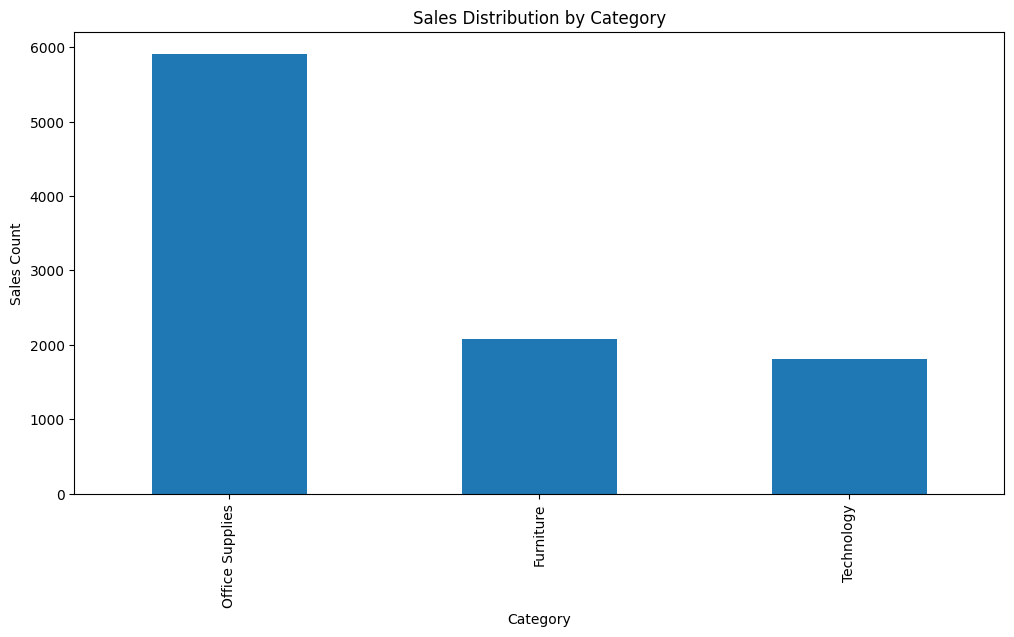

In [30]:
plt.figure(figsize=(12, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales Count')
plt.show()

Sales Variation Over Time


In [33]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
monthly_sales = df.set_index('OrderDate')['Sales'].resample('M').sum()
plt.figure(figsize=(15, 6))
monthly_sales.plot()
plt.title('Monthly Sales Variation Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

KeyError: 'OrderDate'

# Bivariate Analysis

Correlation Analysis

<ipython-input-35-7b324e919061>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


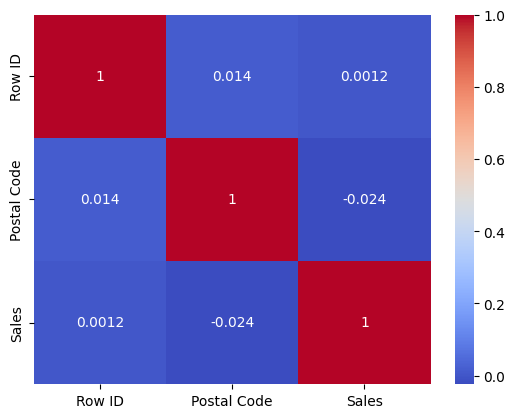

In [35]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Scatter Plots

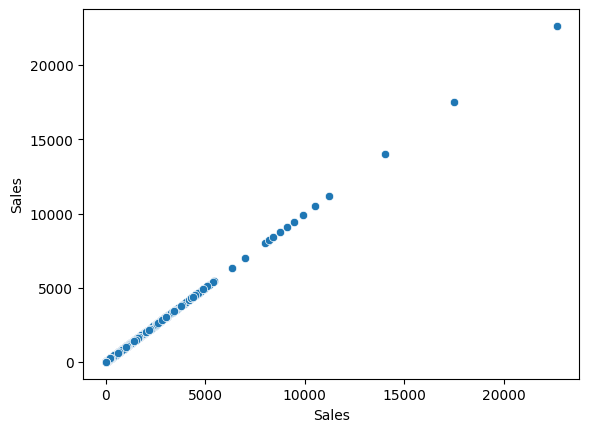

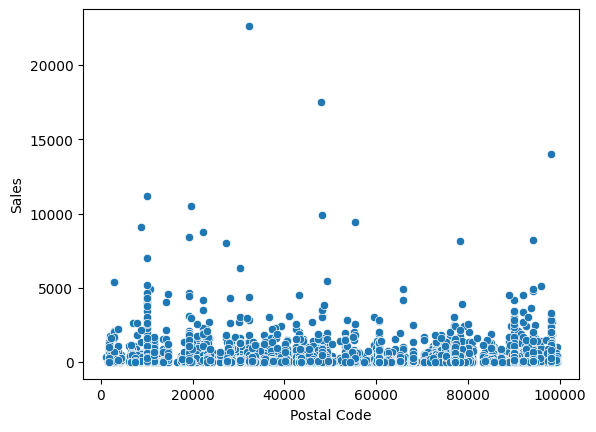

In [38]:
for var in numeric_columns:
    sns.scatterplot(x=var, y='Sales', data=df.reset_index(drop=True))
    plt.show()

Pair Plots

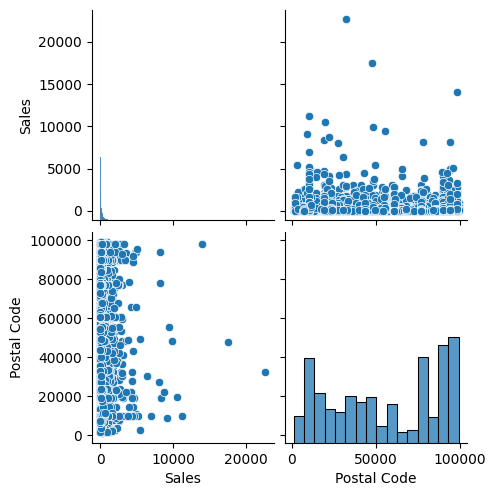

In [40]:
sns.pairplot(df[numeric_columns].reset_index(drop=True))
plt.show()

Heatmaps


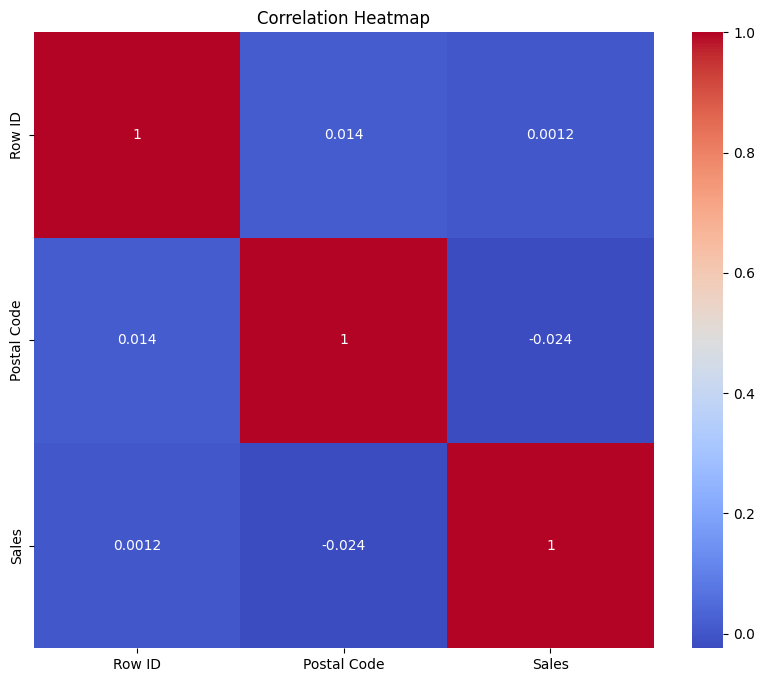

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Sales by Region


<ipython-input-45-98c01ec7a8f3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, ci=None)


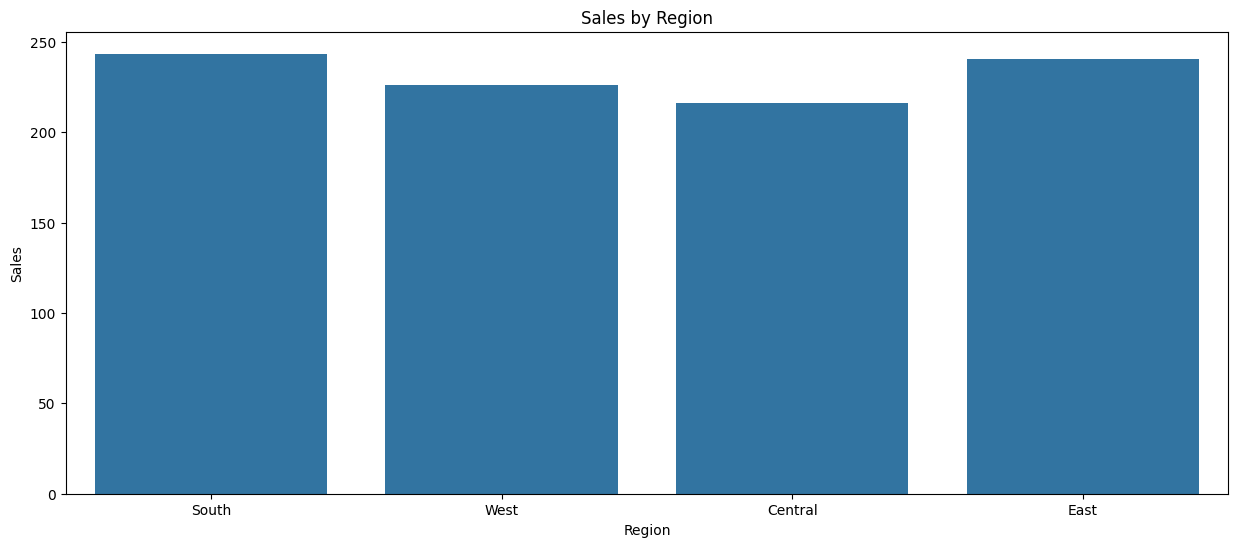

In [45]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='Sales', data=df, ci=None)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

Category-wise Sales Trends

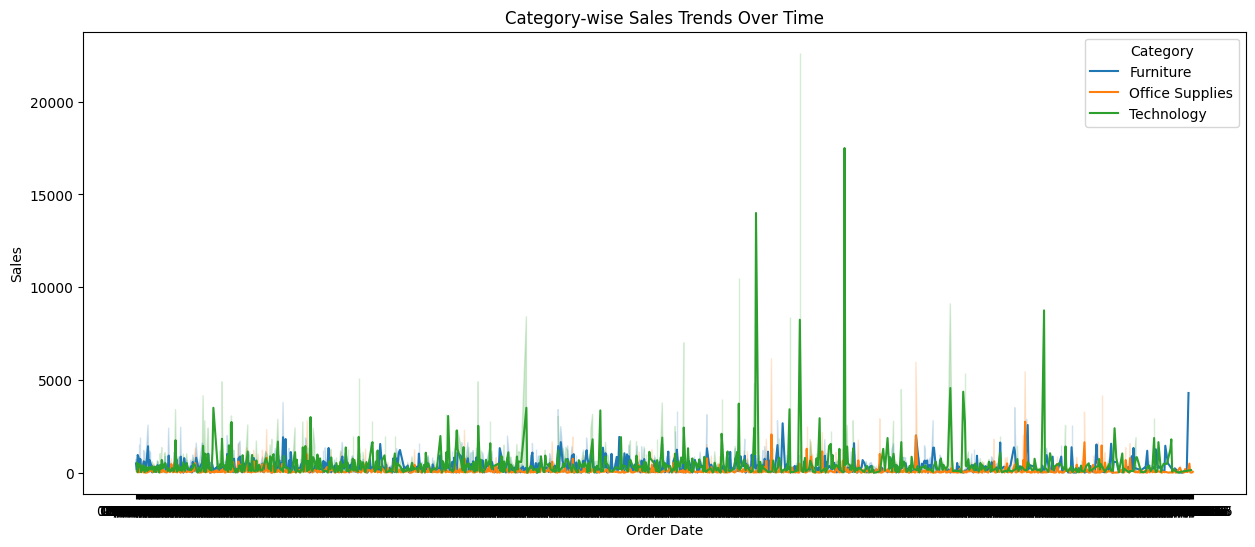

In [59]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Sales', hue='Category', data=df)
plt.title('Category-wise Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

Customer Segment Analysis

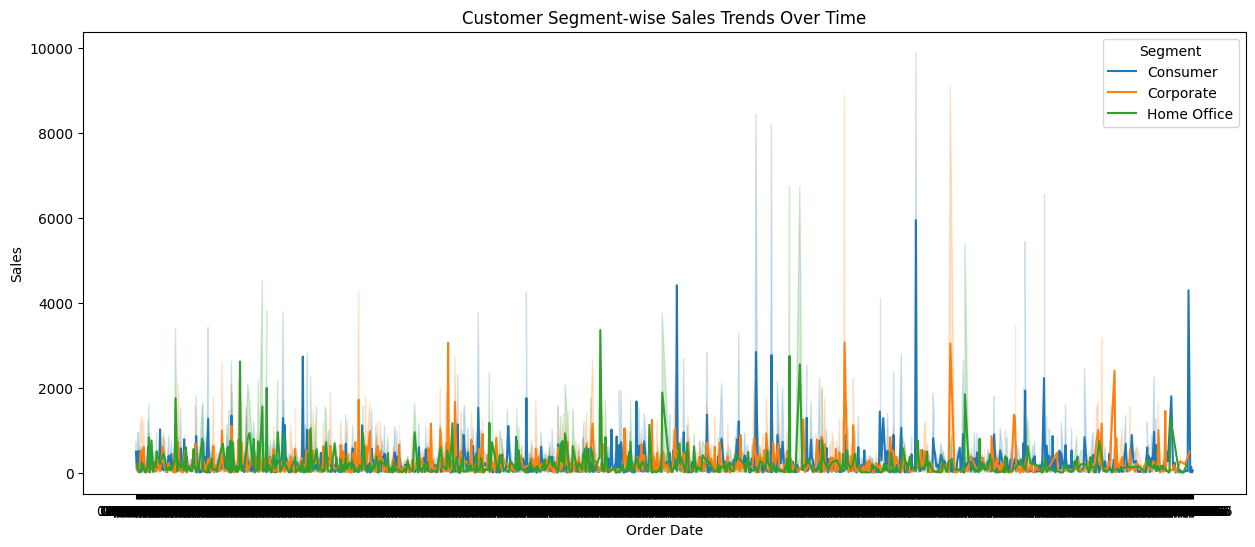

In [60]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Sales', hue='Segment', data=df)
plt.title('Customer Segment-wise Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

Shipping Mode vs. Sales

<Figure size 1000x600 with 0 Axes>

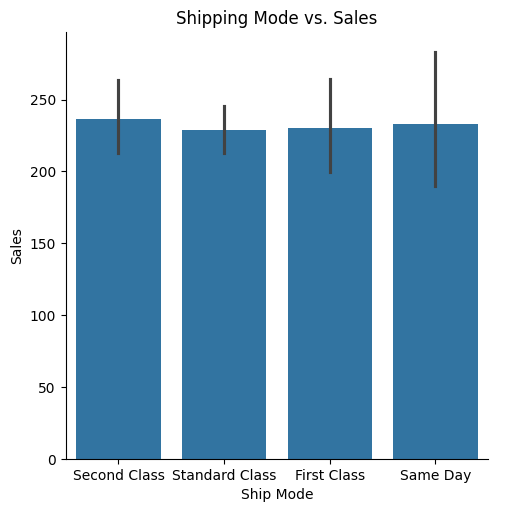

In [66]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Ship Mode', y='Sales', data=df, kind='bar')
plt.title('Shipping Mode vs. Sales')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()

Product-wise Sales Analysis


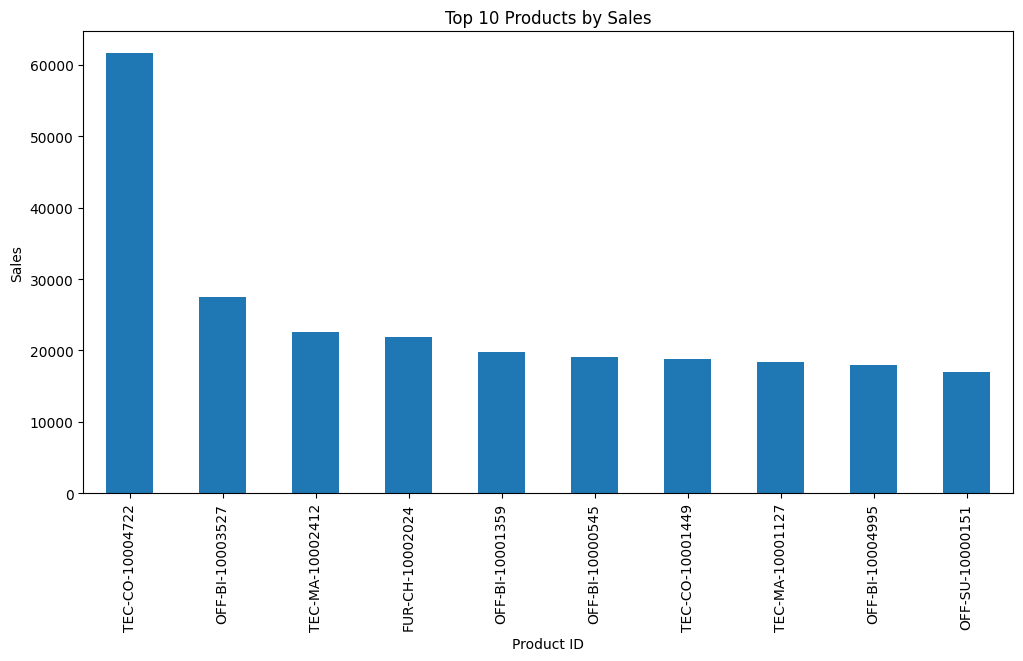

In [65]:
top_products = df.groupby('Product ID')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Sales')
plt.show()

Region-wise Product Sales

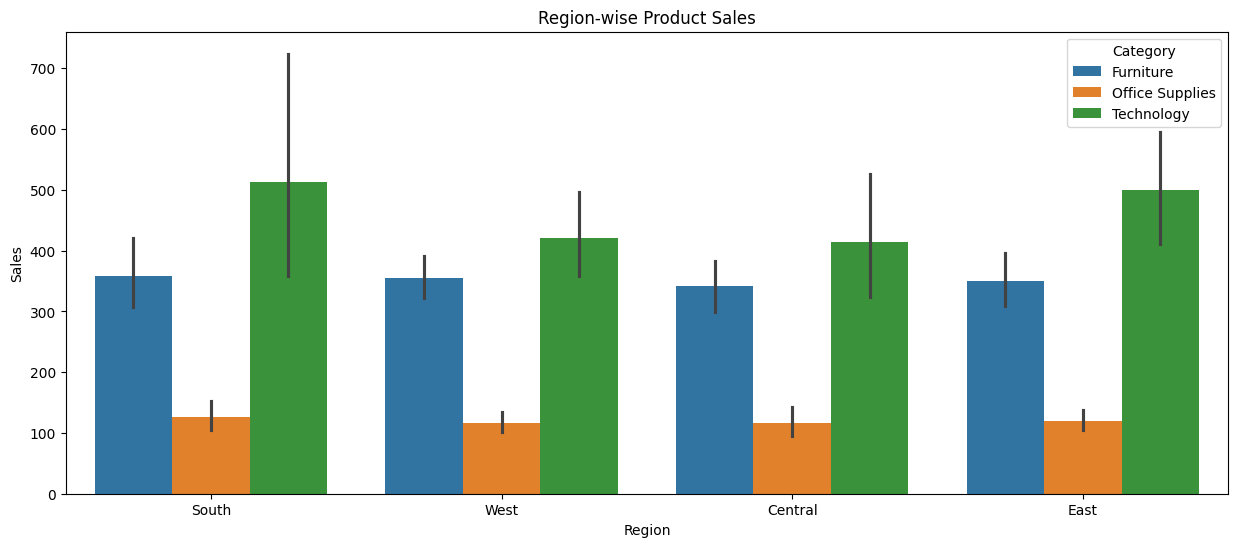

In [67]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Region', y='Sales', hue='Category', data=df)
plt.title('Region-wise Product Sales')
plt.xlabel('Region')4
plt.ylabel('Sales')
plt.show()